In [27]:
import os
import numpy as np
from six.moves import cPickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm

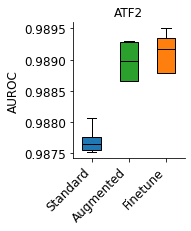

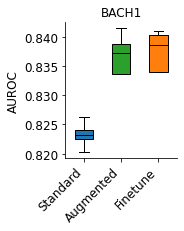

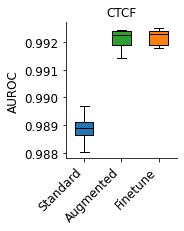

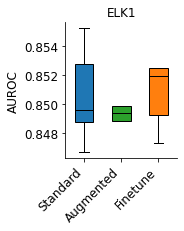

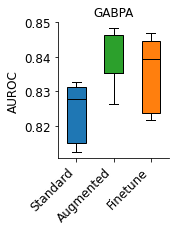

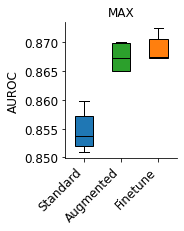

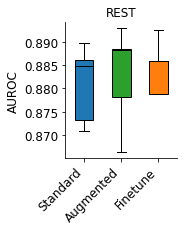

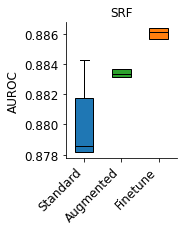

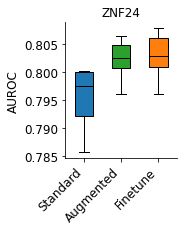

In [39]:
output_dir = '../results_chip/'
expt_name = 'chip_'
task = 0

augs = ['ITD']
exp_names = ['ATF2', 'BACH1', 'CTCF', 'ELK1', 'GABPA', 'MAX', 'REST', 'SRF', 'ZNF24']
 
N = len(exp_names)
fontsize = 12


for exp in exp_names:
    with open(os.path.join(output_dir, expt_name+aug_name+'_'+exp+'_results.pickle'), 'rb') as f:
        results_aug = cPickle.load(f)
        results_finetune = cPickle.load(f)
        results_standard = cPickle.load(f)


    fig = plt.figure(figsize=(2,2.5))
    cmap = cm.ScalarMappable(cmap='tab10')
    rgb = cmap.to_rgba(np.linspace(0, 1, 8))  

    bplot = plt.boxplot(results_standard, 
                        notch=False, 
                        patch_artist=True, 
                        widths=0.5, 
                        positions=[1], 
                        medianprops=dict(color="black",linewidth=1), 
                        showfliers=False);
    for patch in bplot['boxes']:
      patch.set_facecolor(rgb[0,:])
      patch.set_edgecolor('black')

        
    bplot = plt.boxplot(results_aug, 
                        notch=False, 
                        patch_artist=True, 
                        widths=0.5, 
                        positions=[2], 
                        medianprops=dict(color="black",linewidth=1), 
                        showfliers=False);
    for patch in bplot['boxes']:
      patch.set_facecolor(rgb[2,:])
      patch.set_edgecolor('black')
        
    
    bplot = plt.boxplot(results_finetune, 
                        notch=False, 
                        patch_artist=True, 
                        widths=0.5, 
                        positions=[3], 
                        medianprops=dict(color="black",linewidth=1), 
                        showfliers=False);
    for patch in bplot['boxes']:
      patch.set_facecolor(rgb[1,:])
      patch.set_edgecolor('black')
    ax = plt.gca();
    #ax.legend([bplot3["boxes"][0], bplot1["boxes"][0]], ['Augment', 'Finetune'], 
    #          loc='upper left', fontsize=fontsize, frameon=False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.setp(ax.get_yticklabels(), fontsize=fontsize)
    plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    plt.ylabel("AUROC", fontsize=fontsize);
    plt.xticks(range(1,4), ['Standard', 'Augmented', 'Finetune'], fontsize=fontsize, rotation=45, horizontalalignment="right");
    plt.title(exp, fontsize=fontsize)
    fig.savefig('../results_chip/'+exp+'.pdf', format='pdf', dpi=200, bbox_inches='tight')
